<img src="https://www.grag.ai/wp-content/uploads/2024/12/GRAG-ICON-TO-WORDLOGO-Animation_Loop-small-ezgif.com-video-to-gif-converter.gif" alt="GRAG Logo" width="400" style="margin-left:'auto' margin-right:'auto' display:'block'"/>

# Evaluating **RAG TASKS** of [GRAG-LLM-EASY-BENCHMARK](https://huggingface.co/datasets/avemio/GRAG-LLM-EASY-BENCHMARK)


In [62]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [63]:
model_name="GPT-4o-mini"
folder_path="evaluated/"+ "judged"
output_directory = "evaluated/"+ "weighted"

In [64]:
files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

print(files)

['extracted_judged_evaluated_summarizations_test.csv', 'extracted_judged_evaluated_qa-with-multiple-references_test.csv', 'extracted_judged_evaluated_qa-without-timedifference_test.csv', 'extracted_judged_evaluated_classification-json_test.csv', 'extracted_judged_evaluated_qa-with-timedifference_test.csv', 'extracted_judged_evaluated_reasoning_test.csv', 'extracted_judged_evaluated_ocr-correction_test.csv', 'extracted_judged_evaluated_relevant-context_test.csv', 'extracted_judged_evaluated_extraction-recall_test.csv']


In [65]:
df=pd.read_csv(os.path.join(folder_path, files[-1]),sep=';')
df.sample(5)

,System,Instruction,Response,References,model_generated_output,model_References,reasoning_of_metrics_and_correctness,language_quality,overall_correctness,instruction_following,overall_score
494,Welche der folgenden Fragen lässt sich anhand ...,Kontext:\nBetrachtet man die Idee als Urbild u...,Die Frage mit der ID 1000394 kann anhand des K...,['1000394'],Die Fragen mit den IDs 1000392 und 1000394 kön...,[],The target response correctly identifies that ...,85,50,60,60.000
750,Welche der folgenden Fragen lässt sich anhand ...,Kontext:\nDie drei Teilstreitkräfte der Bundes...,Die Frage mit der ID 1000764 kann anhand des K...,['1000764'],Die Frage mit der ID 1000764 kann anhand des K...,['1000764'],The model generated response correctly identif...,100,100,100,100.000
218,Welche der folgenden Fragen lässt sich anhand ...,Kontext:\nBis 1881 entwickelte sich die Standa...,Die Frage mit der ID 1000253 kann anhand des K...,['1000253'],"Die Fragen mit den IDs 1000243, 1000242, 10002...",['1000253'],The target response correctly identifies that ...,85,90,80,85.000
840,Welche der folgenden Fragen lässt sich anhand ...,"Kontext:\nReihenfolge flussabwärts, Zuflüsse d...",Die Frage mit der ID 1000858 kann anhand des K...,['1000858'],"Die Fragen, die anhand des Kontext-Abschnitts ...",[],The target response correctly identifies that ...,80,0,0,20.000
221,Welche der folgenden Fragen lässt sich anhand ...,Kontext:\nDiese Äußerung war sowohl in der Uni...,Die Frage mit der ID 1000217 kann anhand des K...,['1000217'],Die Frage mit der ID 1000217 kann anhand des K...,['1000217'],The model's response correctly identifies that...,90,100,100,98.000


In [66]:
# Ensure the directory exists
os.makedirs(output_directory, exist_ok=True)

In [67]:
exclude_list=["extracted_judged_evaluated_classification-json_test.csv","extracted_judged_evaluated_ocr-correction_test.csv"]

list_non_binary=["extracted_judged_evaluated_reasoning_test.csv","extracted_judged_evaluated_summarizations_test.csv"]

list_language_quality=["extracted_judged_evaluated_summarizations_test.csv",'extracted_judged_evaluated_qa-with-timedifference_test.csv',
                       'extracted_judged_evaluated_qa-without-timedifference_test.csv','extracted_judged_evaluated_qa-with-multiple-references_test.csv',
                       "extracted_judged_evaluated_relevant-context_test.csv","extracted_judged_evaluated_reasoning_test.csv"]

list_overall_correctness=["extracted_judged_evaluated_extraction-recall_test.csv"]

In [68]:
def calculate_overall_score(row, weights):
    if 'overall_correctness_binary_score' in weights:
        return (
        row['language_quality'] * weights['language_quality']
        + row['overall_correctness'] * weights['overall_correctness']
        + row['instruction_following'] * weights['instruction_following']
        + row['overall_correctness_binary_score'] * weights['overall_correctness_binary_score']
    )
    else:
        return (
        row['language_quality'] * weights['language_quality']
        + row['overall_correctness'] * weights['overall_correctness']
        + row['instruction_following'] * weights['instruction_following']
    )

In [69]:
weights_binary_correctness = {
    'language_quality': 0,
    'overall_correctness': 0.5,
    'instruction_following': 0.2,
    'overall_correctness_binary_score': 0.3,
}

weights_binary_language = {
    'language_quality': 0.4,
    'overall_correctness': 0.3,
    'instruction_following': 0.15,
    'overall_correctness_binary_score': 0.15,
}


weights_non_binary_correctness = {
    'language_quality': 0,
    'overall_correctness': 0.6,
    'instruction_following': 0.4,
}

weights_non_binary_language = {
    'language_quality': 0.4,
    'overall_correctness': 0.4,
    'instruction_following': 0.2,
}

weights_reasoning = {
    'language_quality': 0.25,
    'overall_correctness': 0.5,
    'instruction_following': 0.25,
}


weights_relevant_context = {
    'language_quality': 0.2,
    'overall_correctness': 0.3,
    'instruction_following': 0.2,
    'overall_correctness_binary_score': 0.3,
}

In [70]:
for file in files:
    print(file)

    if file not in exclude_list:
        # Read the CSV file into a DataFrame
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path, sep=';')

        # Exclude rows where all specified columns are 0
        df = df.loc[~((df['language_quality'] == 0) & (df['overall_correctness'] == 0) & (df['instruction_following'] == 0))]

        if file not in list_non_binary:
            # Apply different logic based on file name
            if file == 'extracted_judged_evaluated_qa-with-timedifference_test.csv':
                df['overall_correctness_binary_score'] = df.apply(
                    lambda row: 100 if row['Time-Differences'] == row['model_Time-Differences'] and row['References'] == row['model_References'] else 0, axis=1
                )
            else:
                df['overall_correctness_binary_score'] = df.apply(
                    lambda row: 100 if row['References'] == row['model_References'] else 0, axis=1
                )

            df['overall_score'] = df[['language_quality', 'overall_correctness', 'instruction_following', 'overall_correctness_binary_score']].mean(axis=1)

            if file in list_language_quality:
                df['weighted_overall_score'] = df.apply(calculate_overall_score, axis=1, weights=weights_binary_language)
            elif file=="extracted_judged_evaluated_relevant-context_test.csv":
                df['weighted_overall_score'] = df.apply(calculate_overall_score, axis=1, weights=weights_relevant_context)
            else:
                df['weighted_overall_score'] = df.apply(calculate_overall_score, axis=1, weights=weights_binary_correctness)

        else:
            df['overall_score'] = df[['language_quality', 'overall_correctness', 'instruction_following']].mean(axis=1)

            if file in list_overall_correctness:
                df['weighted_overall_score'] = df.apply(calculate_overall_score, axis=1, weights=weights_non_binary_correctness)
            else:
               if file == "extracted_judged_evaluated_reasoning_test.csv":
                df['weighted_overall_score'] = df.apply(calculate_overall_score, axis=1, weights=weights_reasoning)
               else:
                df['weighted_overall_score'] = df.apply(calculate_overall_score, axis=1, weights=weights_non_binary_language)

        # Save the updated DataFrame to a new CSV file
        output_file = os.path.join(output_directory, file.replace('.csv', '_weighted.csv'))
        df.to_csv(output_file, index=False, sep=';')


extracted_judged_evaluated_summarizations_test.csv
extracted_judged_evaluated_qa-with-multiple-references_test.csv
extracted_judged_evaluated_qa-without-timedifference_test.csv
extracted_judged_evaluated_classification-json_test.csv
extracted_judged_evaluated_qa-with-timedifference_test.csv
extracted_judged_evaluated_reasoning_test.csv
extracted_judged_evaluated_ocr-correction_test.csv
extracted_judged_evaluated_relevant-context_test.csv
extracted_judged_evaluated_extraction-recall_test.csv


In [71]:
files = [f for f in os.listdir(output_directory) if os.path.isfile(os.path.join(output_directory, f))]

print(files)

['extracted_judged_evaluated_ocr-correction_test_with_wer.csv', 'extracted_judged_evaluated_qa-with-multiple-references_test_weighted.csv', 'extracted_judged_evaluated_relevant-context_test_weighted.csv', 'extracted_judged_evaluated_qa-without-timedifference_test_weighted.csv', 'extracted_judged_evaluated_extraction-recall_test_weighted.csv', 'extracted_judged_evaluated_summarizations_test_weighted.csv', 'extracted_judged_evaluated_qa-with-timedifference_test_weighted.csv', 'extracted_judged_evaluated_reasoning_test_weighted.csv']


In [72]:
df=pd.read_csv(os.path.join(output_directory, files[4]),sep=';')

# Plotting the **Result**

In [73]:
excluded_list=["extracted_judged_evaluated_classification-json_test_weighted.csv","extracted_judged_evaluated_ocr-correction_test_weighted.csv"]

In [74]:
[file for file in os.listdir(output_directory)]

['extracted_judged_evaluated_ocr-correction_test_with_wer.csv',
 'extracted_judged_evaluated_qa-with-multiple-references_test_weighted.csv',
 'extracted_judged_evaluated_relevant-context_test_weighted.csv',
 'extracted_judged_evaluated_qa-without-timedifference_test_weighted.csv',
 'extracted_judged_evaluated_extraction-recall_test_weighted.csv',
 'extracted_judged_evaluated_summarizations_test_weighted.csv',
 'extracted_judged_evaluated_qa-with-timedifference_test_weighted.csv',
 'extracted_judged_evaluated_reasoning_test_weighted.csv']

In [75]:
ordered_list=["extracted_judged_evaluated_qa-without-timedifference_test_weighted.csv",
              "extracted_judged_evaluated_qa-with-timedifference_test_weighted.csv",
"extracted_judged_evaluated_qa-with-multiple-references_test_weighted.csv",
"extracted_judged_evaluated_relevant-context_test_weighted.csv",
"extracted_judged_evaluated_extraction-recall_test_weighted.csv",
"extracted_judged_evaluated_summarizations_test_weighted.csv",
"extracted_judged_evaluated_reasoning_test_weighted.csv"]

In [76]:
list_overall_correctness=["extracted_judged_evaluated_extraction-recall_test_weighted.csv"]

In [77]:
!wget -O /content/Montserrat-Regular.ttf "https://github.com/JulietaUla/Montserrat/blob/master/fonts/ttf/Montserrat-Regular.ttf?raw=true"
!wget -O /content/Montserrat-Bold.ttf "https://github.com/JulietaUla/Montserrat/blob/master/fonts/ttf/Montserrat-Bold.ttf?raw=true"

--2025-01-12 16:02:34--  https://github.com/JulietaUla/Montserrat/blob/master/fonts/ttf/Montserrat-Regular.ttf?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/JulietaUla/Montserrat/raw/refs/heads/master/fonts/ttf/Montserrat-Regular.ttf [following]
--2025-01-12 16:02:34--  https://github.com/JulietaUla/Montserrat/raw/refs/heads/master/fonts/ttf/Montserrat-Regular.ttf
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JulietaUla/Montserrat/refs/heads/master/fonts/ttf/Montserrat-Regular.ttf [following]
--2025-01-12 16:02:34--  https://raw.githubusercontent.com/JulietaUla/Montserrat/refs/heads/master/fonts/ttf/Montserrat-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.

In [ ]:
import requests

urls = [
    "https://github.com/JulietaUla/Montserrat/blob/master/fonts/ttf/Montserrat-Regular.ttf?raw=true",
    "https://github.com/JulietaUla/Montserrat/blob/master/fonts/ttf/Montserrat-Bold.ttf?raw=true"
]
filenames = ["Montserrat-Regular.ttf", "Montserrat-Bold.ttf"]

for url, filename in zip(urls, filenames):
    response = requests.get(url)
    with open(filename, "wb") as f:
        f.write(response.content)
    print(f"Downloaded {filename}")

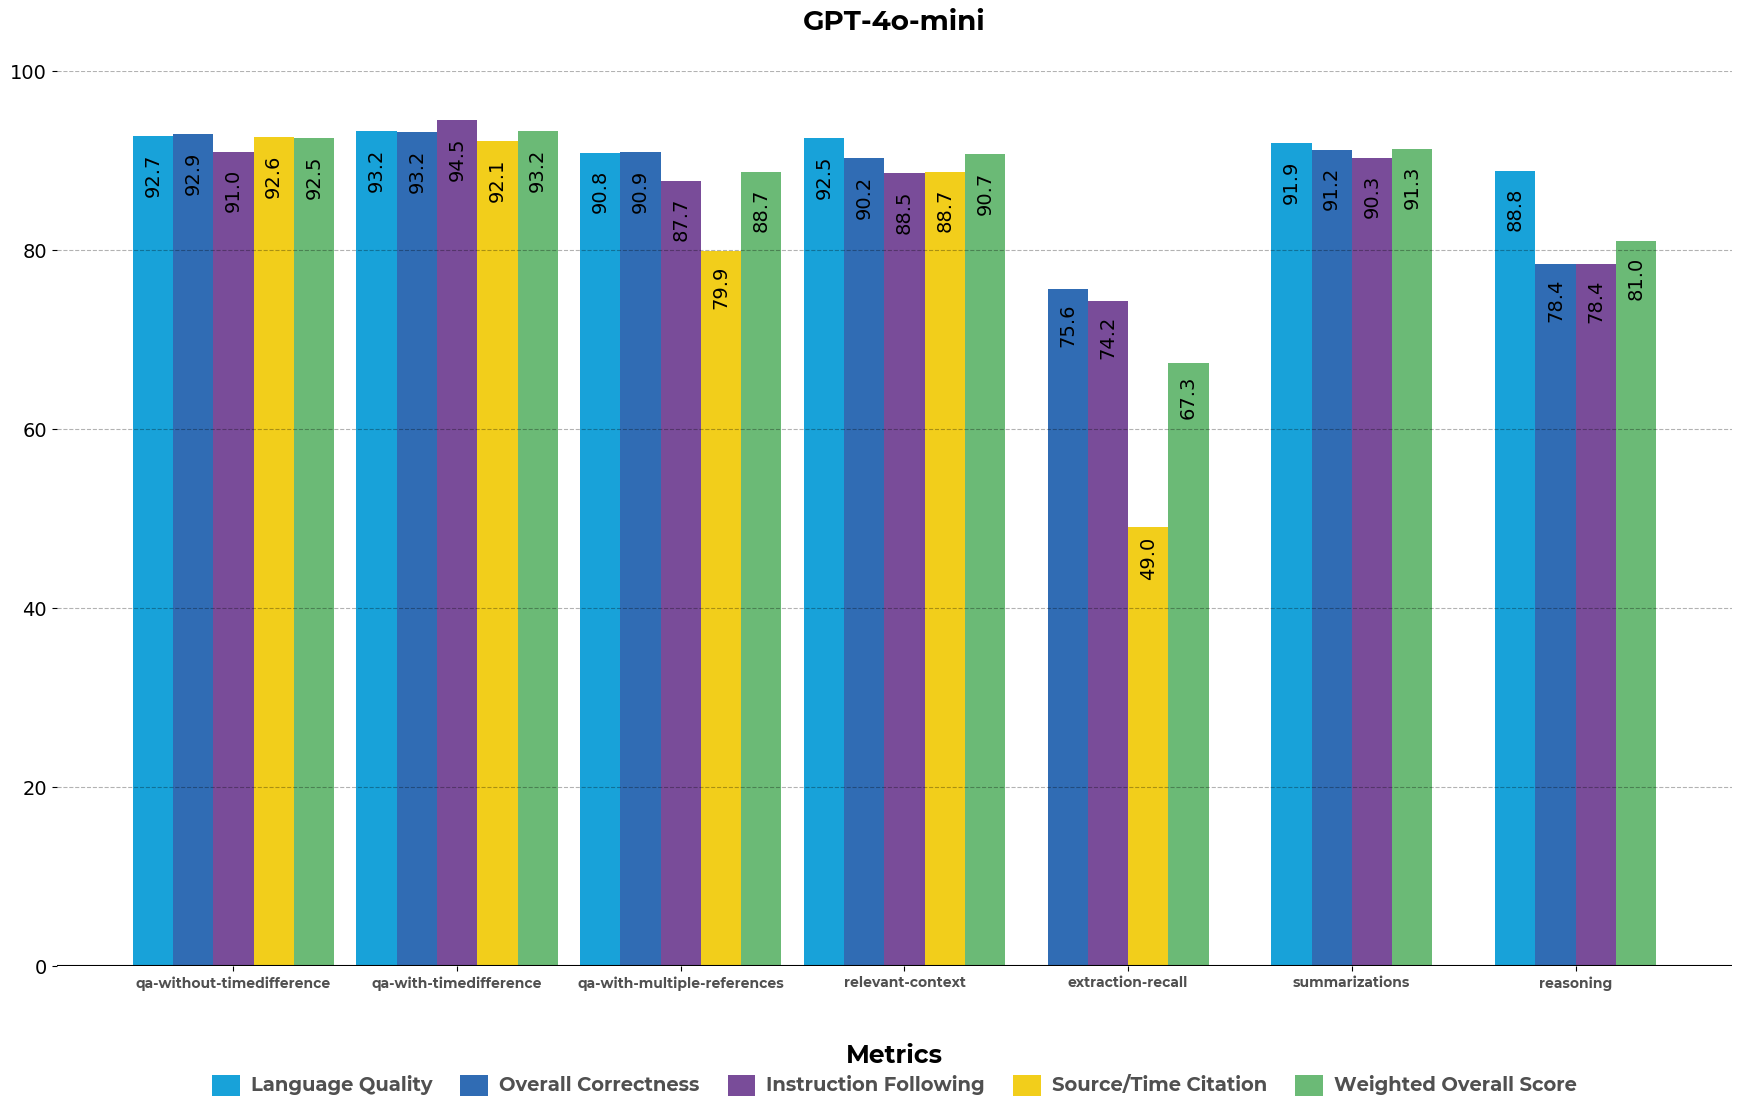

In [78]:
#import warnings
import matplotlib.font_manager as fm

# Desired full metric order
full_metrics = [
    'Language Quality',
    'Overall Correctness',
    'Instruction Following',
    'Overall Correctness Binary Score',
    'Weighted Overall Score'
]

color_map = {
    'Language Quality': '#18A2D9',
    'Overall Correctness':  '#306CB4',
    'Instruction Following': '#794C99',
    'Overall Correctness Binary Score': '#F2CE1B',
    'Weighted Overall Score': '#6BBA76'
}

# Legend name adjustments
legend_name_map = {
    'Language Quality': 'Language Quality',
    'Overall Correctness': 'Overall Correctness',
    'Instruction Following': 'Instruction Following',
    'Overall Correctness Binary Score': 'Source/Time Citation',
    'Weighted Overall Score': 'Weighted Overall Score'
}

# Initialize a dictionary to store task results
results = {}
montserrat_bold = fm.FontProperties(fname="Montserrat-Bold.ttf")
# Iterate over files in the folder path
for file in ordered_list:
    file_path = os.path.join(output_directory, file)
    df = pd.read_csv(file_path, sep=";")

    # Check if binary score column exists
    binary_col_exists = 'overall_correctness_binary_score' in df.columns
    task_name = file.split('_evaluated')[1].split('_test')[0].lstrip('_')

    if file not in list_non_binary and binary_col_exists:
        if file == "extracted_judged_evaluated_extraction-recall_test_weighted.csv":
          # Include overall_correctness_binary_score
          average_scores = df[['overall_correctness', 'instruction_following',
                              'overall_correctness_binary_score', 'weighted_overall_score']].mean()
          results[task_name] = [
                np.nan,  # Language Quality
                average_scores['overall_correctness'],
                average_scores['instruction_following'],
                average_scores['overall_correctness_binary_score'],
                average_scores['weighted_overall_score']
            ]
        else:# Include overall_correctness_binary_score
          average_scores = df[['language_quality', 'overall_correctness', 'instruction_following',
                             'overall_correctness_binary_score', 'weighted_overall_score']].mean()
          results[task_name] = average_scores
    elif file not in list_non_binary and not binary_col_exists:
        # Binary score does not exist, insert NaN for it
        average_scores = df[['language_quality', 'overall_correctness', 'instruction_following',
                             'weighted_overall_score']].mean()
        avg_list = average_scores.tolist()
        # Insert NaN where binary score would be (after 'Instruction Following')
        avg_list.insert(3, np.nan)
        results[task_name] = avg_list
    else:
        # file in list_non_binary (no binary score)
        average_scores = df[['language_quality', 'overall_correctness', 'instruction_following',
                             'weighted_overall_score']].mean()
        avg_list = average_scores.tolist()
        # Insert NaN for binary score
        avg_list.insert(3, np.nan)
        results[task_name] = avg_list

# Create a DataFrame from the results for visualization
results_df = pd.DataFrame(results).T.reset_index()
results_df.columns = ['Task'] + full_metrics
tasks = results_df['Task']

fig, ax = plt.subplots(figsize=(20, 14))
x = np.arange(len(tasks))
bar_width = 0.18  # base width

# To avoid repeating legend entries, track which metrics we've added to legend
plotted_metrics = set()

for j, task in enumerate(tasks):
    # Get the row values
    row = results_df.loc[j, full_metrics]
    # Filter out NaN values
    valid_metrics = row.dropna()
    # Number of valid metrics for this task
    n = len(valid_metrics)
    # Determine positions so bars are centered around x[j]
    for i, (metric_name, value) in enumerate(valid_metrics.items()):
        position = x[j] + (i - (n-1)/2)*bar_width
        bar_color = color_map[metric_name]

        # Plot the bar
        bar = ax.bar(position, value, bar_width, color=bar_color)

        # Place the text if value is above the threshold
        if value > 5:  # Adjust the threshold as needed
            text_y = value * 0.98
            ax.text(
                position, text_y,
                f"{value:.1f}", ha="center", va="top", fontsize=14, rotation=90, color='black'
            )

        # Add legend label only once
        if metric_name not in plotted_metrics:
            label = legend_name_map.get(metric_name, metric_name)
            bar[0].set_label(label)
            plotted_metrics.add(metric_name)

# Formatting the chart
plt.ylim(0, 100)  # Increased y-axis limit to ensure text fits inside the bar
# Update the font properties with explicit font size and weight
montserrat_bold_title = montserrat_bold.copy()
montserrat_bold_title.set_size(20)
montserrat_bold_title.set_weight('bold')

# Set the title with the updated font properties
ax.set_title(model_name, fontproperties=montserrat_bold_title, pad=30)


# Set x-ticks to be just one per task at x[j]
ax.set_xticks(x)
ax.set_xticklabels(tasks, rotation=0, ha="center", fontsize=16)

# Format the x-axis tick labels with Montserrat Bold
for label in ax.get_xticklabels():
    label.set_fontsize(16)  # Set the font size for y-tick labels
    label.set_fontproperties(montserrat_bold)  # Set the font to Montserrat Bold
    label.set_color("#505050")

# Format the y-axis tick labels with Montserrat Bold
for label in ax.get_yticklabels():
    label.set_fontsize(14)  # Set the font size for y-tick labels

# Add the legend with Montserrat font
legend = ax.legend(
    title="Metrics",
    fontsize=14,
    title_fontsize=20,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.16),
    ncol=5,
    frameon=False,
    handleheight=2.0,
    prop=montserrat_bold,  # Font for legend labels
)

for text in legend.get_texts():
    text.set_color("#505050")
    text.set_fontsize(14)

legend.set_title("Metrics")
legend.get_title().set_fontproperties(montserrat_bold)
legend.get_title().set_fontsize(18)

legend.get_frame().set_alpha(0.0)  # Set legend background transparency

ax.grid(axis='y',color='black', linestyle='--', alpha=0.3) # Remove the frame around the plot
for spine in ax.spines.values():
    spine.set_visible(False)

# Add a line at y = 0 (x-axis baseline)
ax.axhline(y=0, color='black', linewidth=1.5, linestyle='-')  # Customize color, width, and style as needed

plt.tight_layout(pad=10.0)  # Add padding between elements

plt.show()

# Ensure all numeric columns are floats
numeric_columns = results_df.columns[1:]  # Exclude 'Task'
results_df[numeric_columns] = results_df[numeric_columns].apply(pd.to_numeric, errors='coerce')
pd.options.display.float_format = '{:.3f}'.format  # Adjust precision if needed

# Evaluating **OCR-PERFORMANCE**

In [79]:
file_path = os.path.join(folder_path, "extracted_judged_evaluated_ocr-correction_test.csv")
df=pd.read_csv(file_path, sep=";")
df.head(5)

,System,Instruction,Response,model_generated_output,reasoning_of_metrics_and_correctness,language_quality,overall_correctness,instruction_following,overall_score
0,Bitte korrigiere diese mit OCR gewonnenen Text...,Da die Monotherapie epileptischer Erkrankungen...,Da die Monotherapie epileptischer Erkrankungen...,Da die Monotherapie epileptischer Erkrankungen...,The model generated response is identical to t...,100.000,100.000,100.000,100.000
1,Bitte korrigiere diese mit OCR gewonnenen Text...,"""Geh aufs Ganze!"" lief vom 2. Januar 1992 bis ...","""Geh aufs Ganze!"" lief vom 2. Januar 1992 bis ...","""Geh aufs Ganze!"" lief vom 2. Januar 1992 bis ...",The model-generated response is identical to t...,100.000,100.000,100.000,100.000
2,Bitte korrigiere diese mit OCR gewonnenen Text...,Darüber hiµaus dbfiniert Domain-driven Design ...,Darüber hinaus definiert Domain-driven Design ...,Darüber hinaus definiert Domain-driven Design ...,The generated response is identical to the tar...,100.000,100.000,100.000,100.000
3,Bitte korrigiere diese mit OCR gewonnenen Text...,Am 4. Oktober 2022 teilte das Bundesverkehrsmi...,Am 4. Oktober 2022 teilte das Bundesverkehrsmi...,Am 4. Oktober 2022 teilte das Bundesverkehrsmi...,The model-generated response matches the targe...,100.000,100.000,100.000,100.000
4,Bitte korrigiere diese mit OCR gewonnenen Text...,"Charakteristische Nebenwirkungen,@die bei der ...","Charakteristische Nebenwirkungen, die bei der ...","Charakteristische Nebenwirkungen, die bei der ...",The generated response matches the target resp...,100.000,100.000,100.000,100.000


In [80]:
!pip install jiwer==2.5.1

In [81]:
from jiwer import wer

def calculate_wer(reference, hypothesis):
    """Calculates the Word Error Rate (WER) between two strings.

    Args:
        reference (str): The ground truth text.
        hypothesis (str): The predicted text.

    Returns:
        float: The WER score.
    """
    return wer(reference, hypothesis)

df['instruction_wer'] = df.apply(lambda row: calculate_wer(row['Instruction'], row['Response']), axis=1)
df['model_generated_output_wer'] = df.apply(lambda row: calculate_wer(row['Response'], row['model_generated_output']), axis=1)

In [82]:
# Assuming 'output_directory' is defined as before
output_file_path = os.path.join(output_directory, "extracted_judged_evaluated_ocr-correction_test_with_wer.csv")

# Save the DataFrame to a CSV file
df.to_csv(output_file_path, sep=";", index=False, encoding='utf-8')

In [83]:
df = pd.read_csv(output_file_path, sep=";")
df.head(5)

,System,Instruction,Response,model_generated_output,reasoning_of_metrics_and_correctness,language_quality,overall_correctness,instruction_following,overall_score,instruction_wer,model_generated_output_wer
0,Bitte korrigiere diese mit OCR gewonnenen Text...,Da die Monotherapie epileptischer Erkrankungen...,Da die Monotherapie epileptischer Erkrankungen...,Da die Monotherapie epileptischer Erkrankungen...,The model generated response is identical to t...,100.000,100.000,100.000,100.000,0.214,0.000
1,Bitte korrigiere diese mit OCR gewonnenen Text...,"""Geh aufs Ganze!"" lief vom 2. Januar 1992 bis ...","""Geh aufs Ganze!"" lief vom 2. Januar 1992 bis ...","""Geh aufs Ganze!"" lief vom 2. Januar 1992 bis ...",The model-generated response is identical to t...,100.000,100.000,100.000,100.000,0.143,0.000
2,Bitte korrigiere diese mit OCR gewonnenen Text...,Darüber hiµaus dbfiniert Domain-driven Design ...,Darüber hinaus definiert Domain-driven Design ...,Darüber hinaus definiert Domain-driven Design ...,The generated response is identical to the tar...,100.000,100.000,100.000,100.000,0.195,0.000
3,Bitte korrigiere diese mit OCR gewonnenen Text...,Am 4. Oktober 2022 teilte das Bundesverkehrsmi...,Am 4. Oktober 2022 teilte das Bundesverkehrsmi...,Am 4. Oktober 2022 teilte das Bundesverkehrsmi...,The model-generated response matches the targe...,100.000,100.000,100.000,100.000,0.158,0.000
4,Bitte korrigiere diese mit OCR gewonnenen Text...,"Charakteristische Nebenwirkungen,@die bei der ...","Charakteristische Nebenwirkungen, die bei der ...","Charakteristische Nebenwirkungen, die bei der ...",The generated response matches the target resp...,100.000,100.000,100.000,100.000,0.250,0.000


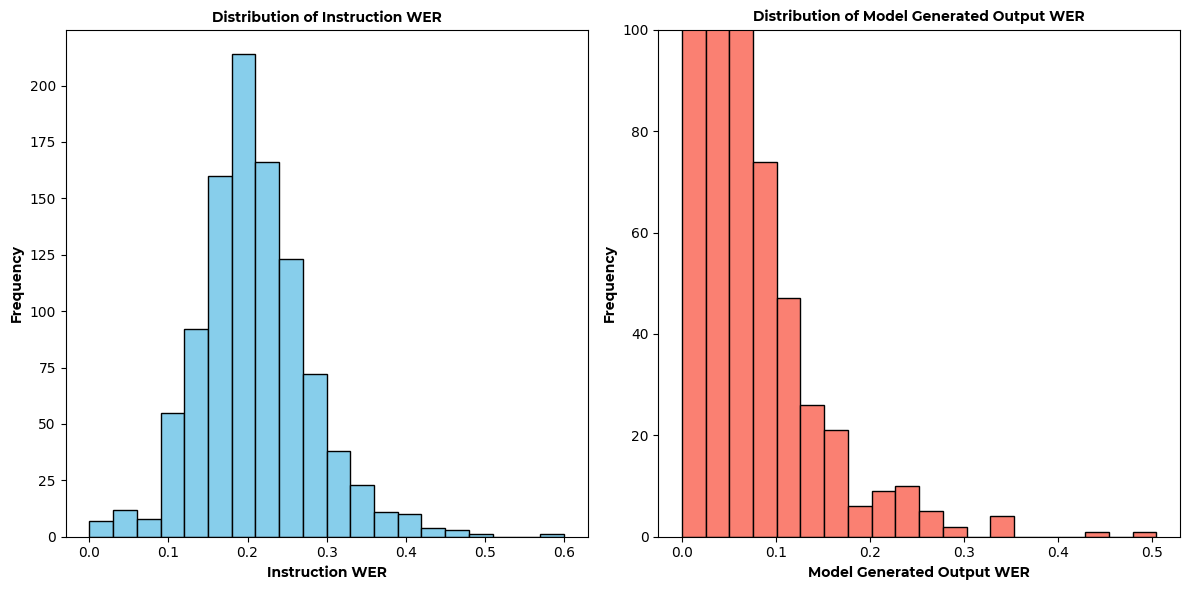

In [84]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the 'instruction_wer' and 'model_generated_output_wer' columns

# Create a figure and axes
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns for side-by-side plots

# Plot 'instruction_wer'
ax[0].hist(df['instruction_wer'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Distribution of Instruction WER', fontproperties=montserrat_bold)
ax[0].set_xlabel('Instruction WER', fontproperties=montserrat_bold)
ax[0].set_ylabel('Frequency', fontproperties=montserrat_bold)

# Plot 'model_generated_output_wer'
ax[1].hist(df['model_generated_output_wer'], bins=20, color='salmon', edgecolor='black')
ax[1].set_title('Distribution of Model Generated Output WER', fontproperties=montserrat_bold)
ax[1].set_xlabel('Model Generated Output WER', fontproperties=montserrat_bold)
ax[1].set_ylabel('Frequency', fontproperties=montserrat_bold)

# Formatting the chart
plt.ylim(0, 100)  # Increased y-axis limit to ensure text fits inside the bar

legend.get_frame().set_alpha(0.0)  # Set legend background transparency


plt.tight_layout(pad=10.0)  # Add padding between elements

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [85]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()

# Fit and transform the WER columns
df[['instruction_wer_scaled', 'model_generated_output_wer_scaled']] = scaler.fit_transform(df[['instruction_wer', 'model_generated_output_wer']])
df['overall_score'] = 0.5 * df['instruction_wer_scaled'] + 0.5 * df['model_generated_output_wer_scaled']
df['overall_score'] = 1 - df['overall_score']

In [86]:
df['overall_score']

,overall_score
0,0.821
1,0.881
2,0.837
3,0.868
4,0.792
...,...
995,0.782
996,0.719
997,0.749
998,0.787


Interpretation:

Higher overall_score indicates better performance: Values closer to 1 represent lower WER values and better model performance in both instruction understanding and output accuracy. Lower overall_score suggests areas for improvement: Values closer to 0 indicate higher WER values and potential weaknesses in the model's ability to comprehend instructions or generate accurate outputs.

# Evaluating **Classification-JSON-PERFORMANCE**

In [87]:
allowed_kategorie = ['Anfrage', 'Frage', 'Instruktion', 'Bitte', 'Arbeitsanweisung', '']
allowed_typ = ['full', 'bullet-points']

In [88]:
import re

file_path= "evaluated/"+ "judged" + '/extracted_judged_evaluated_classification-json_test.csv'

print(file_path)

evaluated/judged/extracted_judged_evaluated_classification-json_test.csv


In [89]:
def fix_json_string(json_str):
    # Remove extra space at the beginning
    json_str = json_str.lstrip("<|im_start|>assistant")  # Remove lstrip and replace with empty string
    json_str = json_str.lstrip("<|assistant|>")  # Remove lstrip and replace with empty string
    json_str = json_str.lstrip("\n")  # Remove lstrip and replace with empty string
    json_str = json_str.lstrip("\\")  # Remove lstrip and replace with empty string
    json_str = json_str.lstrip(" '").replace(" {", "{")

    # Check and fix the last character
    if not json_str.endswith("}"):
      if not json_str.endswith("'"):
        json_str += "'}"
      else:
        json_str += "}"

    return json_str

In [90]:
def validate_json_string(json_str):
    # Initialize controls
    keys_control = 0
    value_control = 0
    format_control = 0

    # Check for required keys as substrings
    has_kategorie = "'kategorie':" in json_str
    has_typ = "'typ':" in json_str
    keys_control = 1 if has_kategorie and has_typ else 0

    # Check for valid values (string containment)
    valid_kategorie = any(f"'kategorie': '{item}'" in json_str for item in allowed_kategorie)
    valid_typ = any(f"'typ': '{item}'" in json_str for item in allowed_typ)
    value_control = 1 if valid_kategorie and valid_typ else 0

    # Check format: ensure no extra text outside the valid JSON structure
    valid_start = json_str.startswith("{") or json_str.startswith("'")
    valid_end = json_str.endswith("}")
    format_control = 1 if valid_start and valid_end and "}" in json_str else 0

    return keys_control, value_control, format_control



In [91]:
# Function to process CSV files for each model
def process_csv_for_models(model_name, file_path):

            # Read the CSV file
            df = pd.read_csv(file_path,sep=';')

            # Apply the `fix_json_string` function to clean the JSON strings
            df['model_generated_output'] = df['model_generated_output'].apply(fix_json_string)

            # Apply the `validate_json` function and create new columns
            df[['keys_control', 'value_control', 'format_control']] = df['model_generated_output'].apply(
                lambda x: pd.Series(validate_json_string(x))
            )

            # Create a new folder within the model's folder
            classification_evaluation_folder = os.path.join(folder_path, 'classification_evaluation')
            os.makedirs(classification_evaluation_folder, exist_ok=True)

            # Save the updated DataFrame to the new folder
            output_csv_path = os.path.join(classification_evaluation_folder, 'classification_evaluation_results.csv')
            df.to_csv(output_csv_path, index=False)


In [92]:
process_csv_for_models(model_name, file_path)

In [93]:
classification_evaluation_folder = os.path.join(folder_path, 'classification_evaluation')
output_csv_path = os.path.join(classification_evaluation_folder, 'classification_evaluation_results.csv')
df=pd.read_csv(output_csv_path, sep=',')
df.sample(5)

,System,Instruction,Response,model_generated_output,reasoning_of_metrics_and_correctness,language_quality,overall_correctness,instruction_following,overall_score,keys_control,value_control,format_control
751,Extrahiere im JSON-Format die Kategorie und de...,Was sind die wichtigsten Punkte zur Geschichte...,"{'kategorie': 'Frage', 'typ': 'bullet-points'}","{'kategorie': 'Frage', 'typ': 'bullet-points'\}",The model generated response correctly identif...,100,100,100,100,1,1,1
218,Extrahiere im JSON-Format die Kategorie und de...,Könntest du bitte eine detaillierte Zusammenfa...,"{'kategorie': 'Anfrage', 'typ': 'full'}","{'kategorie': 'Bitte', 'typ': 'full'\}",The user instruction is a request for a detail...,90,70,60,70,1,1,1
806,Extrahiere im JSON-Format die Kategorie und de...,Fasse den bereitgestellten Textabschnitt in vo...,"{'kategorie': 'Instruktion', 'typ': 'full'}","{'kategorie': 'Instruktion', 'typ': 'full'\}",The model generated response correctly identif...,100,100,100,100,1,1,1
650,Extrahiere im JSON-Format die Kategorie und de...,Welche wichtigen Stationen und Werke prägen di...,"{'kategorie': 'Frage', 'typ': 'bullet-points'}","{'kategorie': 'Frage', 'typ': 'bullet-points'\}",The model generated response correctly identif...,100,100,100,100,1,1,1
41,Extrahiere im JSON-Format die Kategorie und de...,Welche wesentlichen Punkte sollten in einer Zu...,"{'kategorie': 'Frage', 'typ': 'bullet-points'}","{'kategorie': 'Frage', 'typ': 'bullet-points'\}",The target response correctly identifies the c...,100,100,100,100,1,1,1
